In [1]:
import pandas as pd
pd.set_option('max_columns',None)
import numpy as np
import matplotlib as plt

In [6]:
stocks = pd.read_csv('../../../Data/nyse/prices.csv',parse_dates=['date'])
stocks.head(3)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0


In [7]:
stocks=stocks[stocks['symbol']=="GOOG"].set_index('date')
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


In [8]:
shelter_outcomes = pd.read_csv('../../../Data/austin-animal-center-shelter-outcomes-and/aac_shelter_outcomes.csv',
                              parse_dates=['date_of_birth','datetime'])
shelter_outcomes.head(3)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male


In [10]:
shelter_outcomes = shelter_outcomes[['outcome_type','age_upon_outcome','datetime','animal_type','breed','color','sex_upon_outcome','date_of_birth']]
shelter_outcomes.head()

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


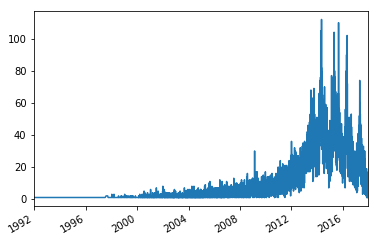

In [12]:
shelter_outcomes['date_of_birth'].value_counts().sort_values().plot.line()

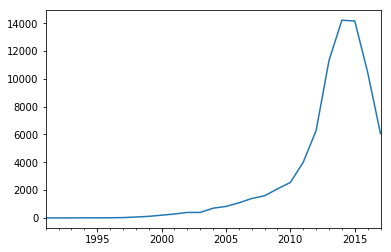

In [15]:
# resampling ('Y' = 'year')
shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum().plot.line()

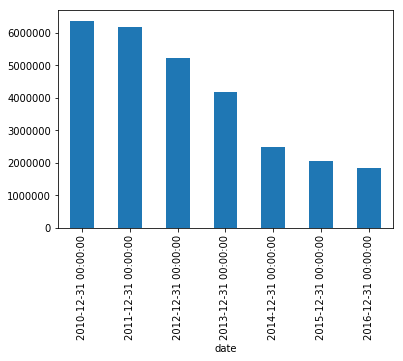

In [17]:
stocks['volume'].resample('Y').mean().plot.bar()

## Some new plot types
### Lag plot

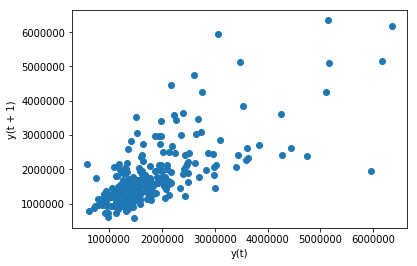

In [18]:
from pandas.plotting import lag_plot
lag_plot(stocks['volume'].tail(250))
# 이전일의 volume이 작으면 다음날의 volume도 작고, 이전일의 volume이 크면 다음날의 volume이 대체적으로 크다.

### Autocorrelation plot
0에서 멀수록 상관관계가 높음.

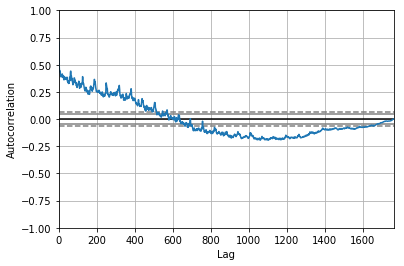

In [19]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stocks['volume'])
# 시간 경과에 따라 volume에 대한 상관관계가 약함.

In [20]:
crypto = pd.read_csv("../../../Data/all-crypto-currencies/crypto-markets.csv")

In [21]:
crypto = crypto[crypto.name == 'Bitcoin']
crypto['date'] = pd.to_datetime(crypto['date'])
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


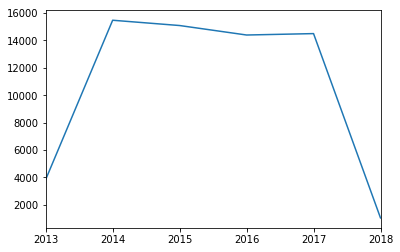

In [23]:
shelter_outcomes['datetime'].value_counts().resample('Y').count().plot.line()

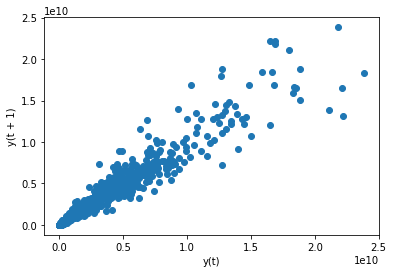

In [27]:
lag_plot(crypto['volume'].tail(2500))

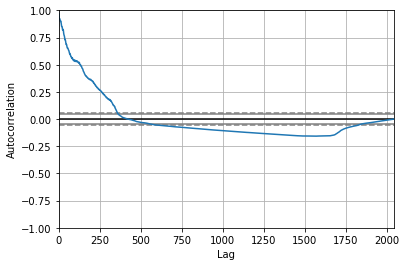

In [28]:
autocorrelation_plot(crypto['volume'])